In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from script import lasso_solver 
%matplotlib inline

# import data
df_train = pd.read_table('data/crime-train.txt')
df_test = pd.read_table('data/crime-test.txt')

X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, :1].values.reshape(-1)

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, :1].values.reshape(-1)


/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
W = np.empty([0, X_train.shape[1]], dtype=np.float64)
regs = [600.0 / (2 ** i) for i in range(10)]
w = np.random.normal(0, 1, W.shape[1])
for i in range(10):
    w = np.copy(W[-1]) if i != 0 else np.random.normal(0, 1, W.shape[1])
    W = np.vstack((W, lasso_solver(X_train, y_train, w, regs[i])))


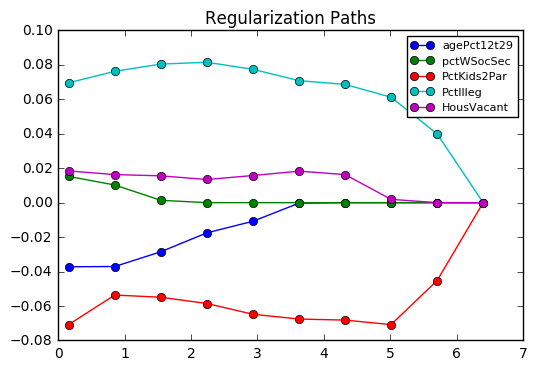

In [3]:
# plot regularization paths
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']
ids = [df_train.columns.get_loc(feature) - 1 for feature in features]

plt.title('Regularization Paths')
plt.plot(np.log(regs), W[:, ids], marker='o')
plt.legend(features, fontsize=8)
plt.show()

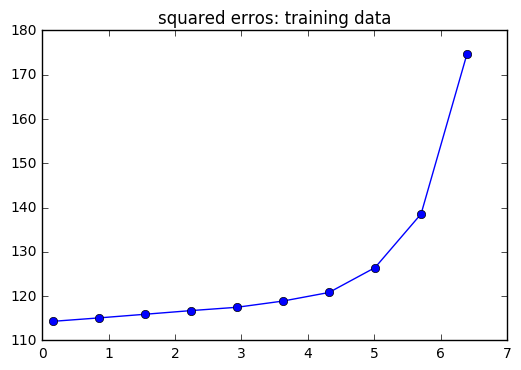

In [4]:
# plot squared errors
err_train = ((np.matmul(X_train, W.T).T - y_train) ** 2).sum(axis=1)
plt.title('squared erros: training data')
plt.plot(np.log(regs), err_train, marker='o')
plt.show()

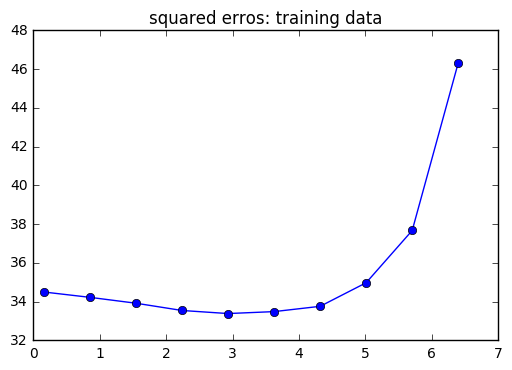

In [5]:
# plot squared errors
err_test = ((np.matmul(X_test, W.T).T - y_test) ** 2).sum(axis=1)
plt.title('squared erros: training data')
plt.plot(np.log(regs), err_test, marker='o')
plt.show()

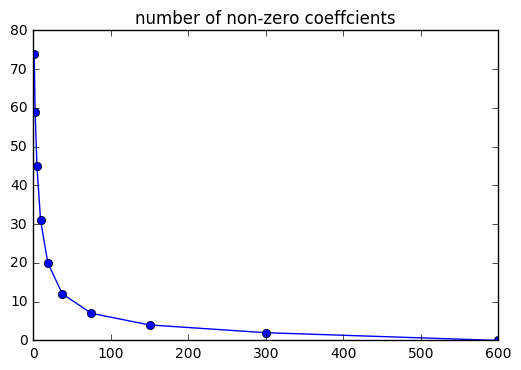

In [6]:
# plot number of non-zero coeffcients
W_count = ((W != 0) * 1).sum(axis=1)
plt.title('number of non-zero coeffcients')
plt.plot(regs, W_count, marker='o')
plt.show()